## 5.1 show RGB channels </font>

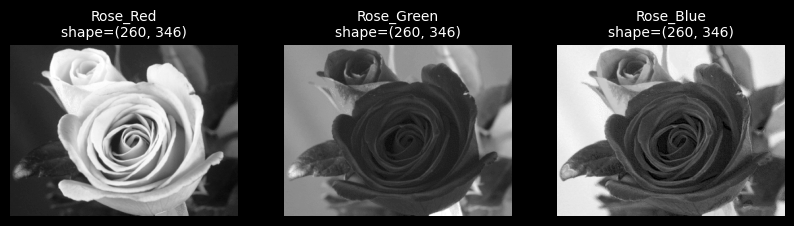

In [1]:
import numpy as np
import cv2
import matplotlib.pyplot as plt

def plot_image(img, title=None, font_size=None, axis="off"): 
    plt.title(title, fontsize=font_size) # plot figure + title
    plt.axis(axis) # remove axes   
    if img.ndim == 3: 
        plt.imshow(img)
    else: 
        plt.imshow(img, cmap=plt.cm.gray)
        
def RGB_model( f ):
    return f[:,:,0], f[:,:,1], f[:,:,2]     
        
def main( ):
    img = cv2.imread( "Rose.bmp", -1 )
    imgRGB = img[:,:,::-1]
    R, G, B = RGB_model( imgRGB)
    
    display_fig_names = [
    "Rose_Red\nshape={}".format(R.shape),
    "Rose_Green\nshape={}".format(G.shape),
    "Rose_Blue\nshape={}".format(B.shape),       
    ]
    display_img = [R, G, B]
    display_fig = plt.figure(figsize=(10, 8))

    for i in range(len(display_img)):
        display_fig.add_subplot(1, len(display_img), i+1)
        plot_image(display_img[i], title=display_fig_names[i])  

main( )

## <font color="Red"> 5.2 show CMY channels </font>

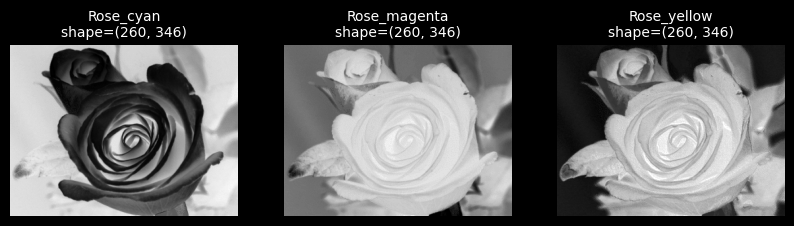

In [2]:
import numpy as np
import cv2
import matplotlib.pyplot as plt

def plot_image(img, title=None, font_size=None, axis="off"): 
    plt.title(title, fontsize=font_size) # plot figure + title
    plt.axis(axis) # remove axes   
    if img.ndim == 3: 
        plt.imshow(img)
    else: 
        plt.imshow(img, cmap=plt.cm.gray)
        
def CMY_model( f ):
#------------------ Code Here --------------------#    
    return 255-f[:,:,0], 255-f[:,:,1], 255-f[:,:,2]
#------------------ Stop Here --------------------#        

def main( ):
    img = cv2.imread( "Rose.bmp", -1 )
    imgRGB = img[:,:,::-1]
    C, M, Y = CMY_model( imgRGB )
    
    display_fig_names = [
    "Rose_cyan\nshape={}".format(C.shape),
    "Rose_magenta\nshape={}".format(M.shape),
    "Rose_yellow\nshape={}".format(Y.shape),       
    ]
    display_img = [C, M, Y]
    display_fig = plt.figure(figsize=(10, 8))

    for i in range(len(display_img)):
        display_fig.add_subplot(1, len(display_img), i+1)
        plot_image(display_img[i], title=display_fig_names[i])  

main( )

## <font color="Red"> 5.3 show CMYK channels </font>

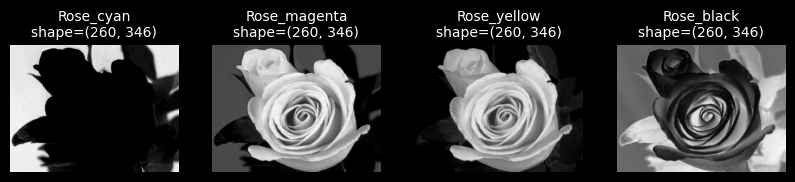

In [3]:
import numpy as np
import cv2
import matplotlib.pyplot as plt

def plot_image(img, title=None, font_size=None, axis="off"): 
    plt.title(title, fontsize=font_size) # plot figure + title
    plt.axis(axis) # remove axes   
    if img.ndim == 3: 
        plt.imshow(img)
    else: 
        plt.imshow(img, cmap=plt.cm.gray)

def CMY_model( f ):
#------------------ Code Here --------------------#    
    return 255-f[:,:,0], 255-f[:,:,1], 255-f[:,:,2]

#------------------ Stop Here --------------------#        

def CMYK_model( f ):
#------------------ Code Here --------------------# 
    C,M,Y = CMY_model(f)
    K = np.min([C,M,Y], axis=0)
    C = C - K
    M = M - K
    Y = Y - K
    return C, M, Y, K
#------------------ Stop Here --------------------#        


def main( ):
    img = cv2.imread( "Rose.bmp", -1 )
    imgRGB = img[:,:,::-1]
    C, M, Y, K = CMYK_model( imgRGB )
    #K = CMYK_model( imgRGB )
    
    display_fig_names = [
    "Rose_cyan\nshape={}".format(C.shape),
    "Rose_magenta\nshape={}".format(M.shape),
    "Rose_yellow\nshape={}".format(Y.shape),     
    "Rose_black\nshape={}".format(K.shape),      
    ]
    display_img = [C, M, Y, K]
    display_fig = plt.figure(figsize=(10, 8))

    for i in range(len(display_img)):
        display_fig.add_subplot(1, len(display_img), i+1)
        plot_image(display_img[i], title=display_fig_names[i])  

main( )

## 5.4 RGB to HSI model </font>

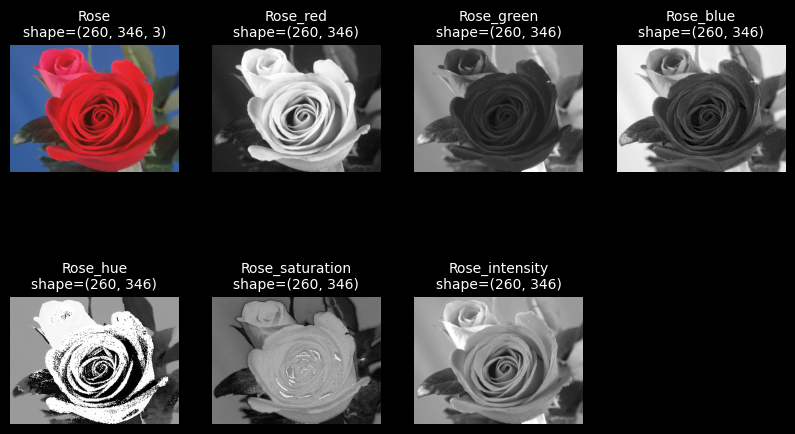

In [4]:
import numpy as np
import cv2

def plot_image(img, title=None, font_size=None, axis="off"): 
    plt.title(title, fontsize=font_size) # plot figure + title
    plt.axis(axis) # remove axes   
    if img.ndim == 3: 
        plt.imshow(img)
    else: 
        plt.imshow(img, cmap=plt.cm.gray)
        
def RGB_to_HSI( R, G, B ):
    r = R / 255
    g = G / 255
    b = B / 255
    if R == G and G == B:  
        H = -1.0  
        S =  0.0
        I = ( r + g + b ) / 3
    else:                  
        x = ( 0.5*((r-g)+(r-b)) )/np.sqrt( (r-g)**2 + (r-b)*(g-b) )
        if x < -1.0:  x = -1.0
        if x >  1.0:  x =  1.0
        theta = np.arccos( x ) * 180 / np.pi
        if B <= G:  
            H = theta
        else:
            H = 360.0 - theta
        S = 1.0 - 3.0 / ( r + g + b ) * min( r, g, b )
        I = ( r + g + b ) / 3
    return H, S, I

def HSI_model( f, channel ):
    nr, nc = f.shape[:2]
    g = np.zeros( [nr, nc], dtype = 'uint8' )
    if channel == 1:   # Hue
        for x in range( nr ):
            for y in range( nc ):
                H, S, I = RGB_to_HSI( f[x,y,0], f[x,y,1], f[x,y,2] )
                if H == -1: 
                    k = 0
                else:
                    k = round( H * 255 / 360 )
                g[x,y] = np.uint8( k )
    elif channel == 2:   # Saturation
        for x in range( nr ):
            for y in range( nc ):
                H, S, I = RGB_to_HSI( f[x,y,0], f[x,y,1], f[x,y,2] )
                k = round( S * 255 )
                g[x,y] = np.uint8( k )
    else:     # Intensity
        for x in range( nr ):
            for y in range( nc ):
                H, S, I = RGB_to_HSI( f[x,y,0], f[x,y,1], f[x,y,2] )
                k = round( I * 255 )
                g[x,y] = np.uint8( k )
    return g

img = cv2.imread( "Rose.bmp", -1 )
imgRGB = img[:,:,::-1]
R = imgRGB[:,:,0]
G = imgRGB[:,:,1]
B = imgRGB[:,:,2]
H = HSI_model( imgRGB, 1 )
S = HSI_model( imgRGB, 2 )
I = HSI_model( imgRGB, 3 )
        
display_fig_names = [
"Rose\nshape={}".format(imgRGB.shape),
"Rose_red\nshape={}".format(R.shape),
"Rose_green\nshape={}".format(G.shape),
"Rose_blue\nshape={}".format(B.shape), 
"Rose_hue\nshape={}".format(H.shape),
"Rose_saturation\nshape={}".format(S.shape),
"Rose_intensity\nshape={}".format(I.shape),        
]
display_img = [imgRGB, R, G, B, H, S, I]
display_fig = plt.figure(figsize=(10, 6))

for i in range(len(display_img)):
    display_fig.add_subplot(2, 4, i+1)
    plot_image(display_img[i], title=display_fig_names[i]) 

## <font color="Red"> 5.5 HSI to RGB model </font>

<font color="Red"> recover original RGB images from HSI images
    

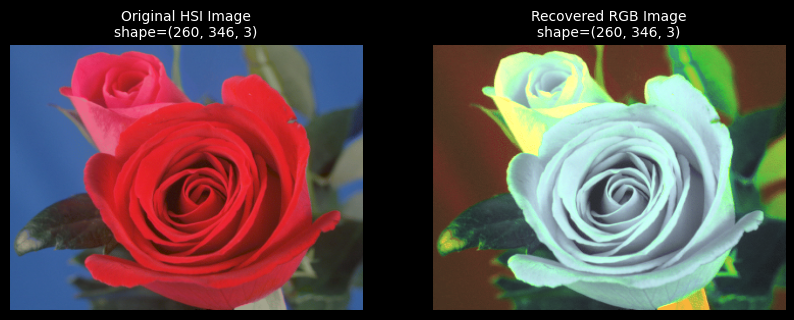

In [6]:
import numpy as np
import cv2
import matplotlib.pyplot as plt

def hsi_to_rgb(hsi):
    h, s, i = cv2.split(hsi)
    h = h * 2 * np.pi  # 將 H 從 [0, 1] 轉換到 [0, 2π]

    r = np.zeros_like(h)
    g = np.zeros_like(h)
    b = np.zeros_like(h)

    # RG sector (0 <= H < 2π/3)
    idx = (0 <= h) & (h < 2 * np.pi / 3)
    b[idx] = i[idx] * (1 - s[idx])
    r[idx] = i[idx] * (1 + s[idx] * np.cos(h[idx]) / np.cos(np.pi / 3 - h[idx]))
    g[idx] = 3 * i[idx] - (r[idx] + b[idx])

    # GB sector (2π/3 <= H < 4π/3)
    idx = (2 * np.pi / 3 <= h) & (h < 4 * np.pi / 3)
    h[idx] = h[idx] - 2 * np.pi / 3
    r[idx] = i[idx] * (1 - s[idx])
    g[idx] = i[idx] * (1 + s[idx] * np.cos(h[idx]) / np.cos(np.pi / 3 - h[idx]))
    b[idx] = 3 * i[idx] - (r[idx] + g[idx])

    # BR sector (4π/3 <= H < 2π)
    idx = (4 * np.pi / 3 <= h) & (h < 2 * np.pi)
    h[idx] = h[idx] - 4 * np.pi / 3
    g[idx] = i[idx] * (1 - s[idx])
    b[idx] = i[idx] * (1 + s[idx] * np.cos(h[idx]) / np.cos(np.pi / 3 - h[idx]))
    r[idx] = 3 * i[idx] - (g[idx] + b[idx])

    rgb = cv2.merge((r, g, b))
    rgb = np.clip(rgb * 255, 0, 255).astype(np.uint8)  # 將範圍從 [0, 1] 轉換到 [0, 255]

    return rgb

def main():
    # 假設 hsi_image 是已經讀取的 HSI 影像，範圍在 [0, 1]
    hsi_image = cv2.imread('Rose.bmp', cv2.IMREAD_UNCHANGED).astype(np.float32) / 255.0
    if hsi_image is None:
        print("Error: Image not found or unable to load.")
        return

    rgb_image = hsi_to_rgb(hsi_image)

    display_fig_names = [
        "Original HSI Image\nshape={}".format(hsi_image.shape),
        "Recovered RGB Image\nshape={}".format(rgb_image.shape),  
    ]
    display_img = [hsi_image, rgb_image]
    display_fig = plt.figure(figsize=(10, 8))

    for i in range(len(display_img)):
        display_fig.add_subplot(1, len(display_img), i+1)
        plot_image(display_img[i], title=display_fig_names[i])

    plt.show()

def plot_image(img, title=None, font_size=None, axis="off"): 
    plt.title(title, fontsize=font_size) # plot figure + title
    plt.axis(axis) # remove axes   
    if img.ndim == 3 and img.shape[2] == 3: 
        plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
    else: 
        plt.imshow(img, cmap=plt.cm.gray)

main()

## <font color="Red">5.6 Image Brightness</font> 
<font color="Red">Step 1: RGB to YCbCr      
    Step 2: apply gamma correction with gamma = 0.5 on plane Y    
    Step 3: recover YCbCr to RGB    
    Step 4: compare with gamma correction with gamma = 0.5 on planes RGB

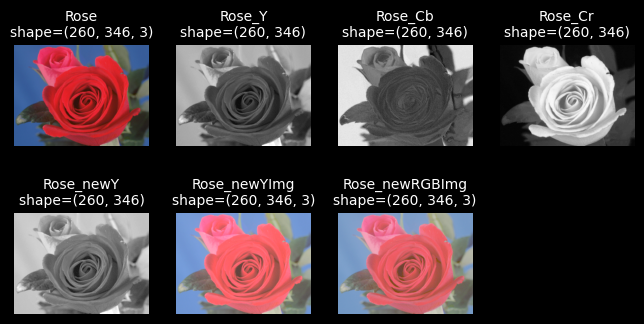

In [7]:
import numpy as np
import cv2

def plot_image(img, title=None, font_size=None, axis="off"): 
    plt.title(title, fontsize=font_size) # plot figure + title
    plt.axis(axis) # remove axes   
    if img.ndim == 3: 
        plt.imshow(img)
    else: 
        plt.imshow(img, cmap=plt.cm.gray)

def gamma_correction( f, gamma = 2.0 ):
    g = f.copy( )
    nr, nc = f.shape[:2]
    c =  255.0 / ( 255.0 ** gamma )
    table = np.zeros( 256 )   
    for i in range( 256 ):
        table[i] = round( c * i ** gamma, 0 )
    if f.ndim != 3:
        for x in range( nr ):
            for y in range( nc ):
                g[x,y] = table[f[x,y]]
    else:
        for x in range( nr ):
            for y in range( nc ):
                for k in range( 3 ):
                    g[x,y,k] = table[f[x,y,k]]                    
    return g

def RGB_2_YCrCb( f ):
    ycrcb = cv2.cvtColor( f, cv2.COLOR_BGR2YCrCb )
    return ycrcb[:,:,0], ycrcb[:,:,1], ycrcb[:,:,2]

def YCrCb_brightness( f , rate):
#------------------ Code Here --------------------#       
    ycrcb = cv2.cvtColor(f, cv2.COLOR_BGR2YCrCb)
    Y, Cr, Cb = ycrcb[:, :, 0], ycrcb[:, :, 1], ycrcb[:, :, 2]
    Y = gamma_correction(Y, gamma=rate)
    ycrcb[:, :, 0] = Y
    newimg = cv2.cvtColor(ycrcb, cv2.COLOR_YCrCb2BGR)


#------------------ Code Here --------------------#       
    return ycrcb[:,:,0], newimg

def RGB_brightness( f , rate):
#------------------ Code Here --------------------#
    newf = gamma_correction(f, gamma=rate)


#------------------ Code Here --------------------#       
    return newf

img = cv2.imread( "Rose.bmp", -1 )
imgRGB = img[:,:,::-1]
Y, Cb,Cr = RGB_2_YCrCb(imgRGB)
rate = 0.5
newY, newImg = YCrCb_brightness( imgRGB , rate)
newImg2 = RGB_brightness( imgRGB , rate)

display_fig_names = [
"Rose\nshape={}".format(imgRGB.shape),
"Rose_Y\nshape={}".format(Y.shape),
"Rose_Cb\nshape={}".format(Cb.shape),
"Rose_Cr\nshape={}".format(Cr.shape), 
"Rose_newY\nshape={}".format(newY.shape),
"Rose_newYImg\nshape={}".format(newImg.shape),
"Rose_newRGBImg\nshape={}".format(newImg2.shape),
]
display_img = [imgRGB, Y, Cb, Cr, newY, newImg, newImg2]
display_fig = plt.figure(figsize=(8, 4))

for i in range(len(display_img)):
    display_fig.add_subplot(2, 4, i+1)
    plot_image(display_img[i], title=display_fig_names[i]) 
